In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv('data_YesBank_StockPrices.csv')
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [51]:
df['Date'].unique() #185 months #15.4years
# Assuming from july-05-2005 to nov-20-2020 

array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
       'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
       'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
       'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
       'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
       'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
       'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
       'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
       'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
       'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
       'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
       'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
       'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
       'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
       'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-

In [52]:

# Let's create a new 'Year' column and then combine it to form a complete date.

# Generate a list of years starting from 2005 for 185 dates
years = np.arange(2005, 2005 + int(np.ceil(185 / 12)))

# Repeat each year for 12 months, then trim to 185 entries
year_sequence = np.repeat(years, 12)[:185]

# Assign the year sequence to a new column
df['Year'] = year_sequence

# If you want to combine 'Date' and 'Year' into a new datetime column:
df['Full_Date'] = df['Date'] + '-' + df['Year'].astype(str)
df['Full_Date'] = pd.to_datetime(df['Full_Date'], format='%b-%d-%Y')

df[['Date', 'Year', 'Full_Date']].head()

,Date,Year,Full_Date
0,Jul-05,2005,2005-07-05
1,Aug-05,2005,2005-08-05
2,Sep-05,2005,2005-09-05
3,Oct-05,2005,2005-10-05
4,Nov-05,2005,2005-11-05


In [53]:
df['Date'].nunique()
185/12

15.416666666666666

In [54]:
df.describe()

,Open,High,Low,Close,Year,Full_Date
count,185.000000,185.000000,185.000000,185.000000,185.000000,185
mean,105.541405,116.104324,94.947838,105.204703,2012.216216,2012-09-16 19:27:34.054054144
min,10.000000,11.240000,5.550000,9.980000,2005.000000,2005-01-06 00:00:00
25%,33.800000,36.140000,28.510000,33.450000,2008.000000,2008-11-08 00:00:00
50%,62.980000,72.550000,58.000000,62.540000,2012.000000,2012-09-12 00:00:00
75%,153.000000,169.190000,138.350000,153.300000,2016.000000,2016-07-16 00:00:00
max,369.950000,404.000000,345.500000,367.900000,2020.000000,2020-11-20 00:00:00
std,98.879850,106.333497,91.219415,98.583153,4.466878,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       185 non-null    object        
 1   Open       185 non-null    float64       
 2   High       185 non-null    float64       
 3   Low        185 non-null    float64       
 4   Close      185 non-null    float64       
 5   Year       185 non-null    int32         
 6   Full_Date  185 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int32(1), object(1)
memory usage: 9.5+ KB


In [56]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Year         0
Full_Date    0
dtype: int64

In [57]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Year', 'Full_Date'], dtype='object')

In [58]:
df.head()

,Date,Open,High,Low,Close,Year,Full_Date
0,Jul-05,13.00,14.00,11.25,12.46,2005,2005-07-05
1,Aug-05,12.58,14.88,12.55,13.42,2005,2005-08-05
2,Sep-05,13.48,14.87,12.27,13.30,2005,2005-09-05
3,Oct-05,13.20,14.47,12.40,12.99,2005,2005-10-05
4,Nov-05,13.35,13.88,12.88,13.41,2005,2005-11-05


In [69]:
# Calculate derived features
df['Price_Range'] = df['High'] - df['Low']
df['Returns'] = df['Close'].pct_change() * 100


C:\Users\mkhateed\AppData\Local\Temp\ipykernel_3232\2853461409.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Close', data=yearly_mean, palette='viridis')


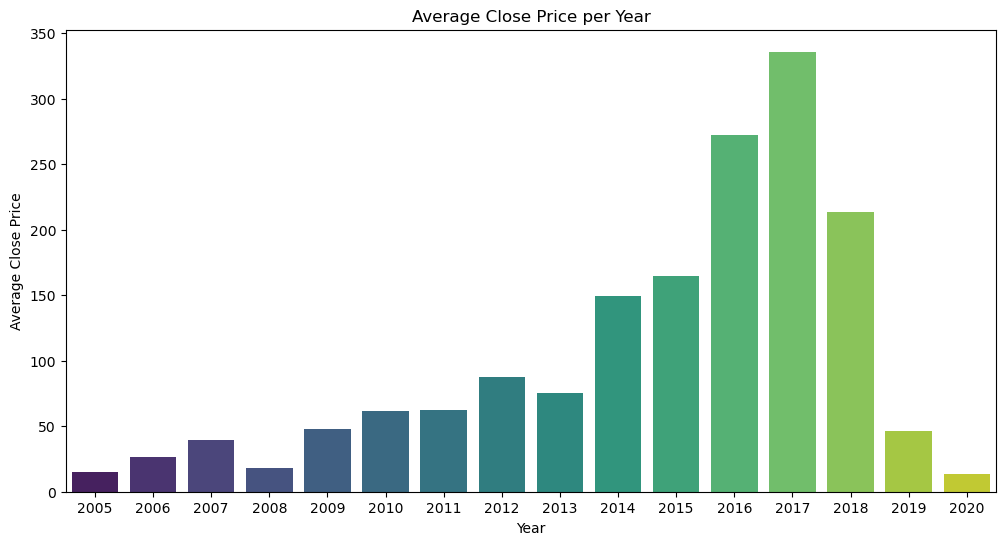

In [59]:
# Extract year from 'Full_Date' and add as a new column
df['Year'] = df['Full_Date'].dt.year

# Group by year and calculate mean Close price (or any other aggregation)
yearly_mean = df.groupby('Year')['Close'].mean().reset_index()

# Barplot of average Close price per year
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Close', data=yearly_mean, palette='viridis')
plt.title('Average Close Price per Year')
plt.ylabel('Average Close Price')
plt.xlabel('Year')
plt.show()

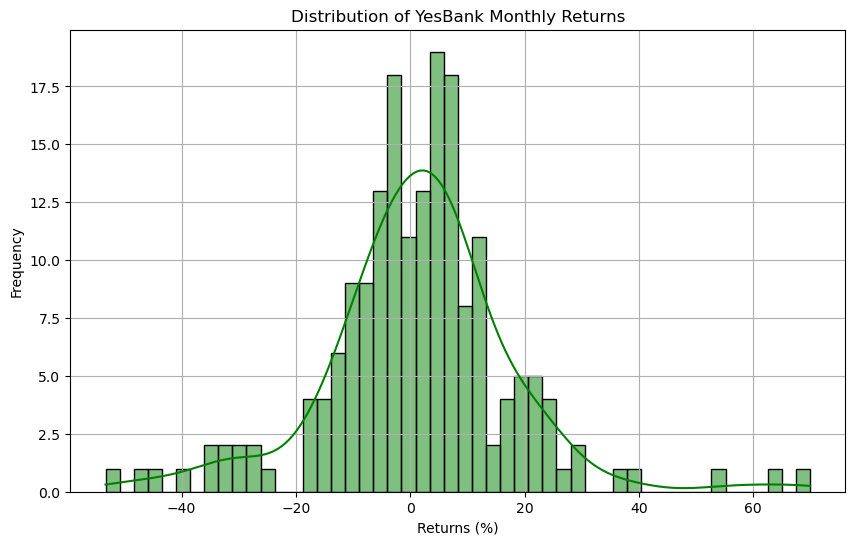

In [78]:
# Plot 5: Daily Returns Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Returns'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribution of YesBank Monthly Returns')
plt.xlabel('Returns (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('returns_distribution.png')
plt.show()
plt.close()


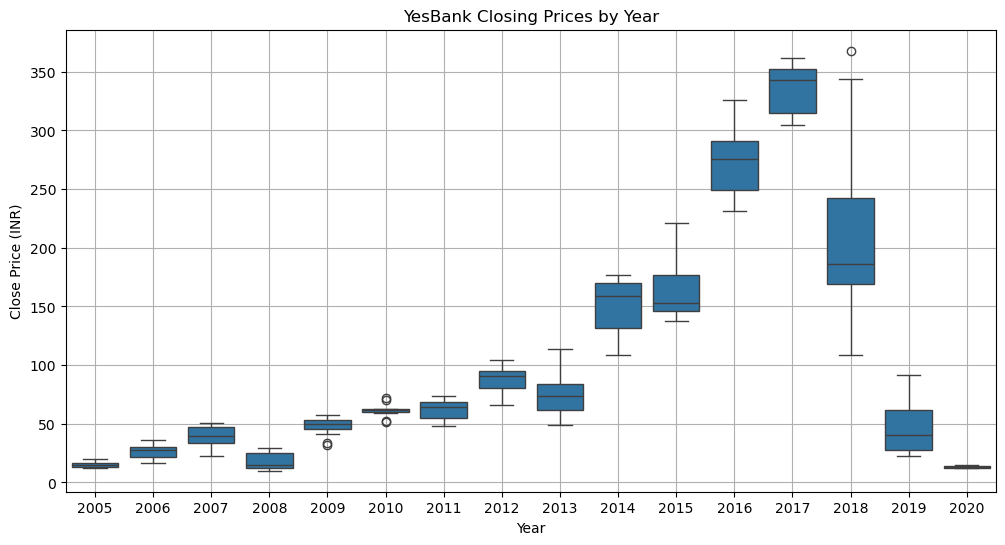

In [79]:
# Plot 6: Box Plot of Closing Prices by Year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Close', data=df.reset_index())
plt.title('YesBank Closing Prices by Year')
plt.xlabel('Year')
plt.ylabel('Close Price (INR)')
plt.grid(True)
plt.savefig('boxplot_by_year.png')
plt.show()
plt.close()

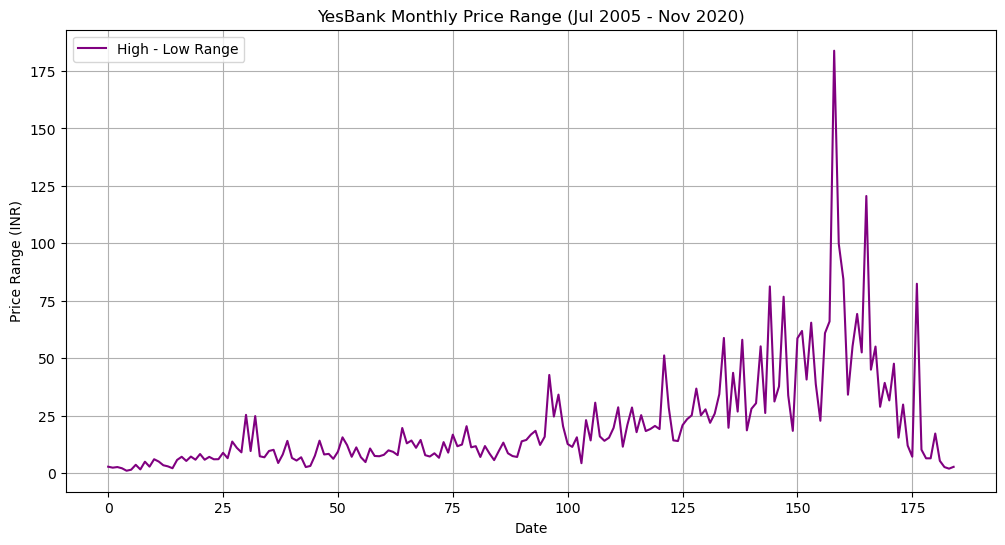

In [80]:
# Monthly price Range plot.
"""Reason: A larger range indicates higher volatility, which can correlate with market events or uncertainty, 
providing insight into risk periods """
# 
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price_Range'], label='High - Low Range', color='purple')
plt.title('YesBank Monthly Price Range (Jul 2005 - Nov 2020)')
plt.xlabel('Date')
plt.ylabel('Price Range (INR)')
plt.grid(True)
plt.legend()
plt.savefig('price_range.png')
plt.show()
plt.close()

In [60]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Open,High,Low,Close,Year
Open,1.000000,0.993040,0.983978,0.977971,0.620171
High,0.993040,1.000000,0.983422,0.985051,0.634655
Low,0.983978,0.983422,1.000000,0.995358,0.594014
Close,0.977971,0.985051,0.995358,1.000000,0.602476
Year,0.620171,0.634655,0.594014,0.602476,1.000000


In [61]:
df.head()

,Date,Open,High,Low,Close,Year,Full_Date
0,Jul-05,13.00,14.00,11.25,12.46,2005,2005-07-05
1,Aug-05,12.58,14.88,12.55,13.42,2005,2005-08-05
2,Sep-05,13.48,14.87,12.27,13.30,2005,2005-09-05
3,Oct-05,13.20,14.47,12.40,12.99,2005,2005-10-05
4,Nov-05,13.35,13.88,12.88,13.41,2005,2005-11-05


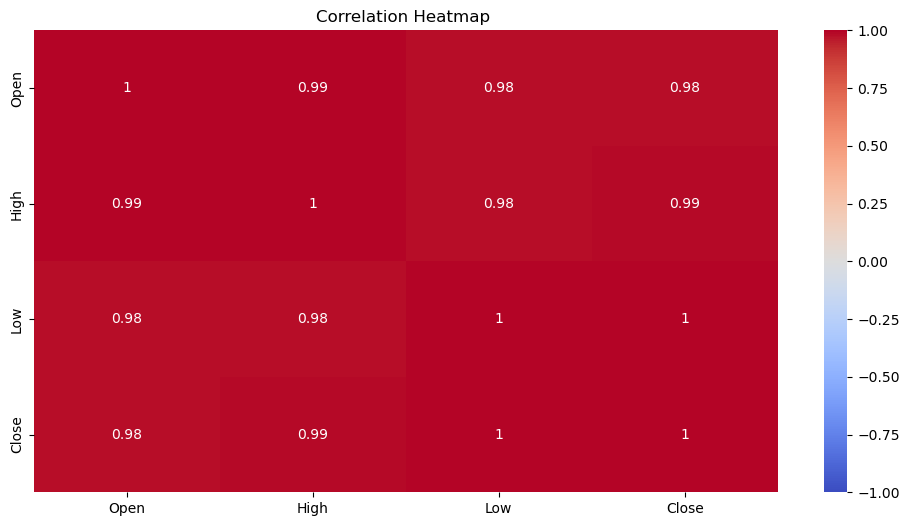

In [81]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap ')
plt.savefig('correlation_heatmap.png')
plt.show()
plt.close()

<Figure size 1200x600 with 0 Axes>

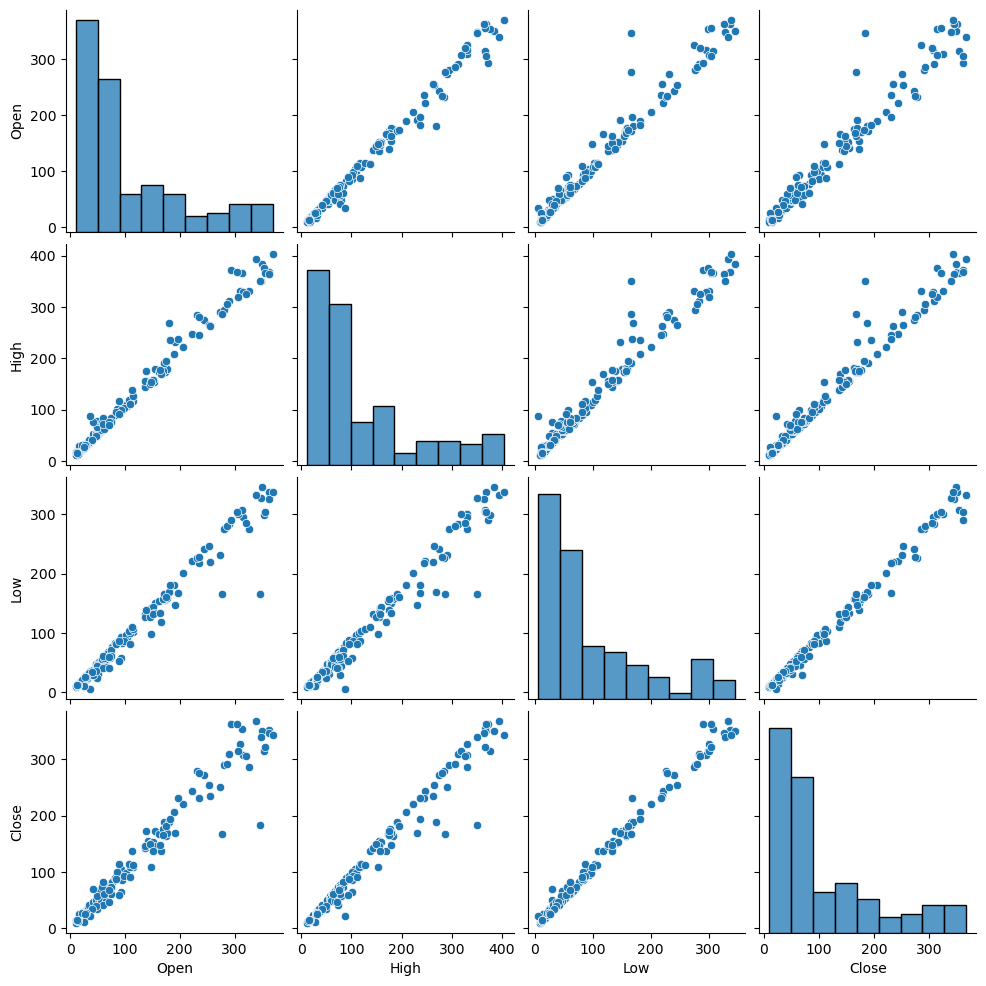

In [84]:
plt.figure(figsize=(12, 6))
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.savefig('pairplot.png')
plt.show()


In [89]:
df.head()

,Date,Open,High,Low,Close,Year,Full_Date,Price_Range,Returns
0,Jul-05,13.00,14.00,11.25,12.46,2005,2005-07-05,2.75,NaN
1,Aug-05,12.58,14.88,12.55,13.42,2005,2005-08-05,2.33,7.704655
2,Sep-05,13.48,14.87,12.27,13.30,2005,2005-09-05,2.60,-0.894188
3,Oct-05,13.20,14.47,12.40,12.99,2005,2005-10-05,2.07,-2.330827
4,Nov-05,13.35,13.88,12.88,13.41,2005,2005-11-05,1.00,3.233256


In [94]:
# Split data: pre-2018 (Jul-05 to Dec-17) and post-2018 (Jan-18 to Nov-20)
pre_2018 = df[df['Full_Date'] < '2018-01-01']
post_2018 = df[df['Full_Date'] >= '2018-01-01']

In [97]:
# Test 1: Two-Sample T-Test for Mean Returns
from scipy import stats
returns_pre = pre_2018['Returns']
returns_post = post_2018['Returns']
t_stat, p_value = stats.ttest_ind(returns_pre, returns_post, equal_var=False)  # Welch's t-test
print("Test 1: Mean Returns Before vs. After 2018 (Two-Sample T-Test)")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
print("Conclusion: ", "Reject H₀ (means differ)" if p_value < 0.05 else "Fail to reject H₀ (no evidence means differ)")


Test 1: Mean Returns Before vs. After 2018 (Two-Sample T-Test)
T-Statistic: nan, P-Value: nan
Conclusion:  Fail to reject H₀ (no evidence means differ)


In [ ]:
""" Reason: The 2018-2019 period marked YesBank’s financial distress (.
 Comparing returns before and after can quantify the impact on stock performance. A two-sample 
 t-test is suitable for comparing means of two independent groups.
 """

In [98]:
#  One-Sample T-Test for Non-Zero Mean Returns
returns_all = df['Returns'].dropna()
t_stat_one, p_value_one = stats.ttest_1samp(returns_all, 0)
print("\nTest 3: Non-Zero Mean Returns (One-Sample T-Test)")
print(f"T-Statistic: {t_stat_one:.4f}, P-Value: {p_value_one:.4f}")
print("Conclusion: ", "Reject H₀ (mean returns ≠ 0)" if p_value_one < 0.05 else "Fail to reject H₀ (mean returns = 0)")


Test 3: Non-Zero Mean Returns (One-Sample T-Test)
T-Statistic: 1.2281, P-Value: 0.2210
Conclusion:  Fail to reject H₀ (mean returns = 0)
